## DNN (mnist)

In [1]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mnist = tf.keras.datasets.mnist

In [2]:
# (훈련데이터셋, 레이블), (테스트데이터셋, 레이블)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train[0:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


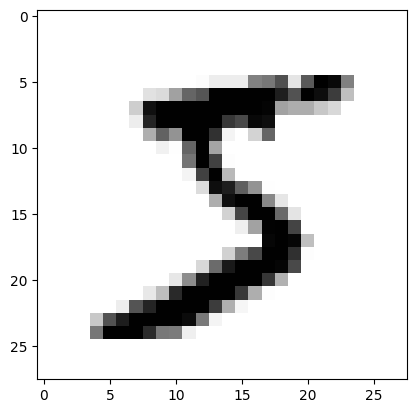

In [4]:
# 출력 확인
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

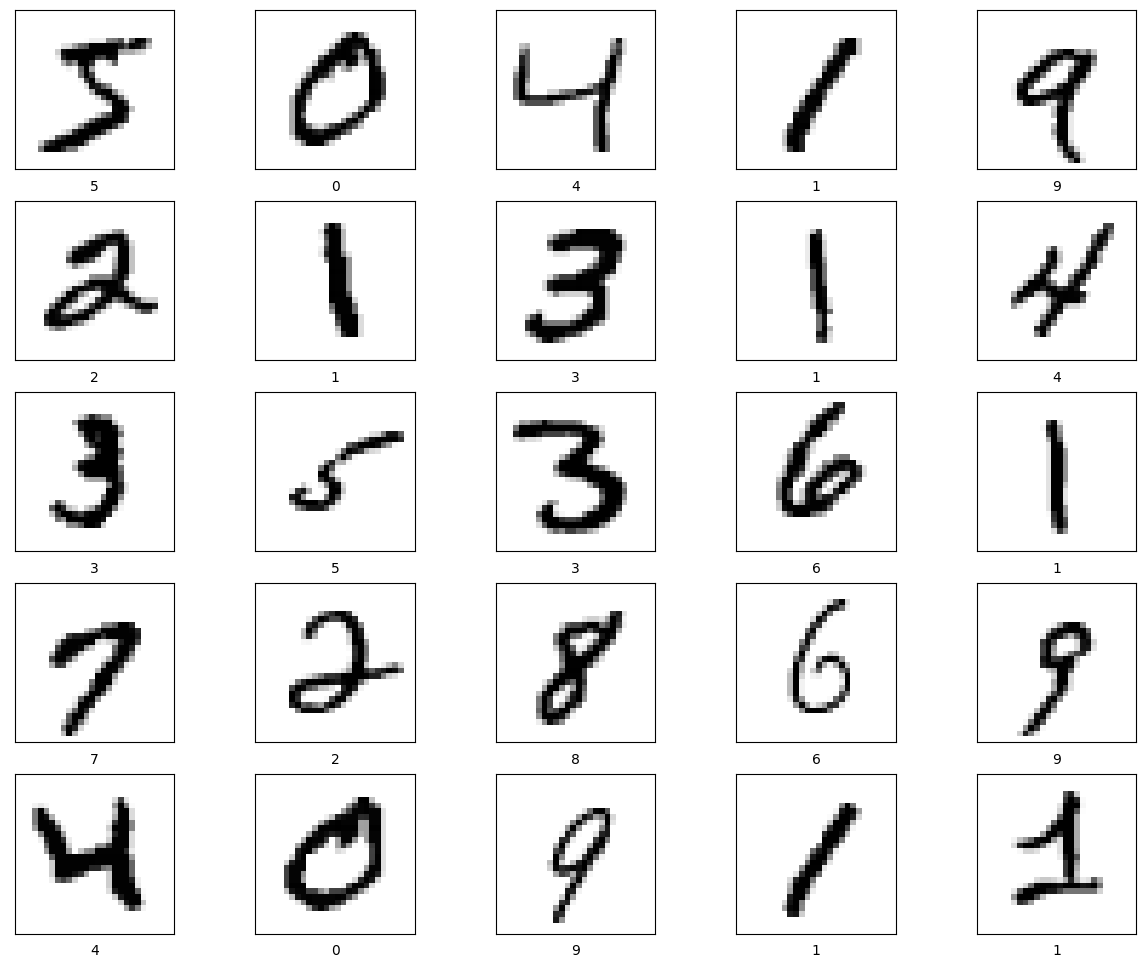

In [5]:
# 시각화 확인
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(15,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xlabel(class_names[y_train[i]])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [6]:
# 정규화
x_train_dnn, x_test_dnn = x_train / 255, x_test / 255

In [7]:
# 모델 생성
model_dnn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 훈련
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_dnn.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 1s 927us/step - loss: 2.8837 - accuracy: 0.7471 - val_loss: 0.6049 - val_accuracy: 0.8524
Epoch 2/15
1500/1500 [==============================] - 1s 832us/step - loss: 0.6691 - accuracy: 0.8278 - val_loss: 0.4861 - val_accuracy: 0.9025
Epoch 3/15
1500/1500 [==============================] - 1s 834us/step - loss: 0.5312 - accuracy: 0.8645 - val_loss: 0.3293 - val_accuracy: 0.9218
Epoch 4/15
1500/1500 [==============================] - 1s 823us/step - loss: 0.4620 - accuracy: 0.8795 - val_loss: 0.2990 - val_accuracy: 0.9293
Epoch 5/15
1500/1500 [==============================] - 1s 848us/step - loss: 0.4268 - accuracy: 0.8880 - val_loss: 0.2934 - val_accuracy: 0.9320
Epoch 6/15
1500/1500 [==============================] - 1s 839us/step - loss: 0.3898 - accuracy: 0.8977 - val_loss: 0.3048 - val_accuracy: 0.9308
Epoch 7/15
1500/1500 [==============================] - 1s 803us/step - loss: 0.3788 - accuracy: 0.9011 - val_loss: 0.2653 -

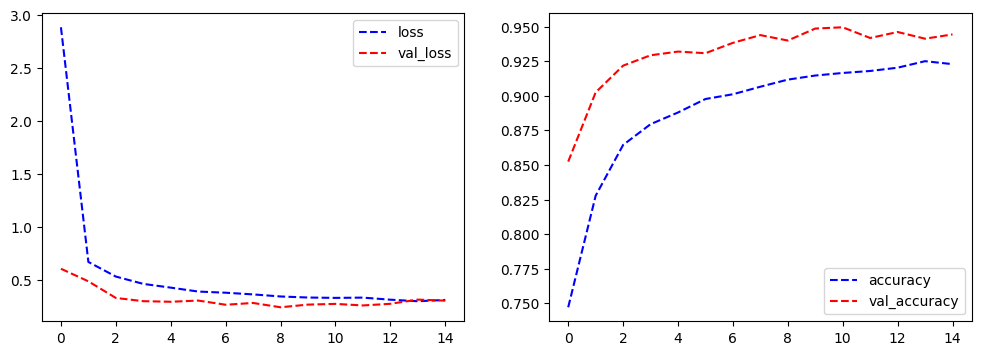

In [9]:
# 훈련결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # loss (loss, val_loss)
plt.plot(history.history['loss'], 'b--', label='loss')                  # 훈련 손실
plt.plot(history.history['val_loss'], 'r--', label='val_loss')          # 검증 손실
plt.legend()

plt.subplot(1,2,2) # accuracy (accuracy, val_accuracy)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')          # 훈련 정확도
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')  # 검증 정확도
plt.legend()
plt.show()

In [10]:
# 테스트 데이터셋으로 평가 (10000개)
model_dnn.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3230 - accuracy: 0.9438


[0.3229943513870239, 0.9437999725341797]

## CNN (mnist)

In [1]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mnist = tf.keras.datasets.mnist

In [2]:
# (훈련데이터셋, 레이블), (테스트데이터셋, 레이블)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# CNN에 필요한 입력차원은 3차원이므로 데이터셋 차원 변경
x_train_cnn = x_train.reshape((-1,28,28,1)) / 255
x_test_cnn = x_test.reshape((-1,28,28,1)) / 255

In [4]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        1300      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 100)       125100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4900)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               627328    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_cnn.fit(x_train_cnn, y_train, epochs=15, 
                        batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1127 - accuracy: 0.9646 - val_loss: 0.0503 - val_accuracy: 0.9837
Epoch 2/15
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0448 - val_accuracy: 0.9881
Epoch 3/15
1500/1500 [==============================] - 77s 51ms/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 4/15
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0421 - val_accuracy: 0.9903
Epoch 5/15
1500/1500 [==============================] - 76s 50ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0360 - val_accuracy: 0.9907
Epoch 6/15
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0407 - val_accuracy: 0.9900
Epoch 7/15
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0471 -

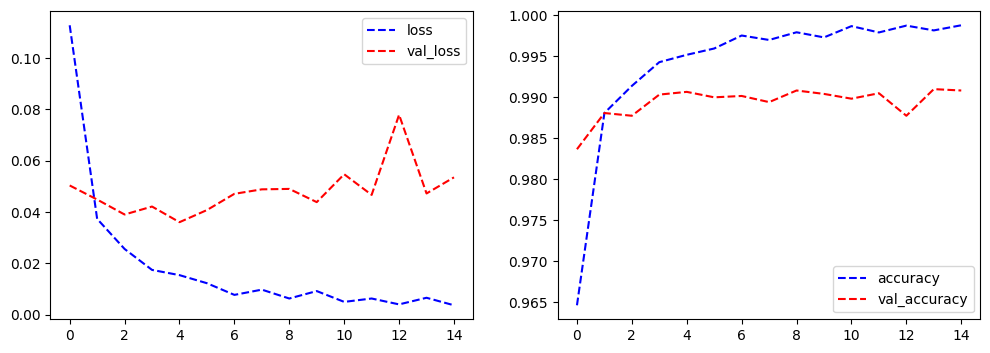

In [6]:
# 훈련결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # loss (loss, val_loss)
plt.plot(history.history['loss'], 'b--', label='loss')                  # 훈련 손실
plt.plot(history.history['val_loss'], 'r--', label='val_loss')          # 검증 손실
plt.legend()

plt.subplot(1,2,2) # accuracy (accuracy, val_accuracy)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')          # 훈련 정확도
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')  # 검증 정확도
plt.legend()
plt.show()

In [7]:
# 테스트 데이터셋으로 평가 (10000개)
model_cnn.evaluate(x_test_cnn, y_test, verbose=2)  # 손실과 정확도 측정

313/313 - 3s - loss: 0.0478 - accuracy: 0.9917


[0.04783621057868004, 0.9916999936103821]

## CNN (mnist, dropout 추가)

In [8]:
model_cnn2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [9]:
model_cnn2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_cnn2.fit(x_train_cnn, y_train, epochs=15, 
                        batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1968 - accuracy: 0.9381 - val_loss: 0.0548 - val_accuracy: 0.9836
Epoch 2/15
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0405 - val_accuracy: 0.9880
Epoch 3/15
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 4/15
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 5/15
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0318 - val_accuracy: 0.9908
Epoch 6/15
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0331 - val_accuracy: 0.9899
Epoch 7/15
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0351 -

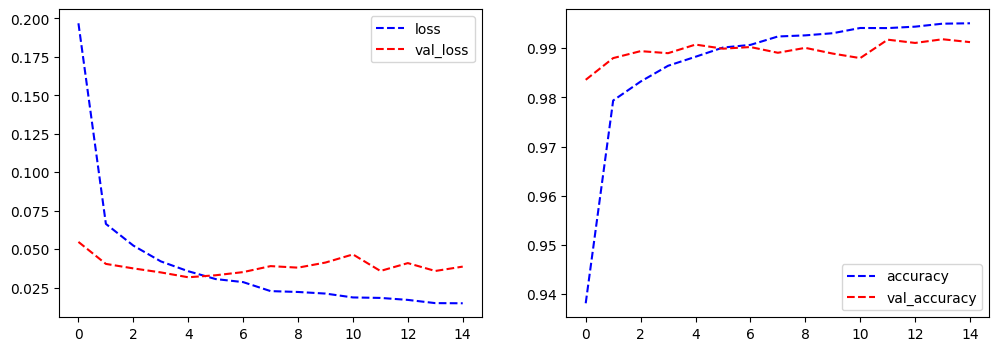

In [10]:
# 훈련결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # loss (loss, val_loss)
plt.plot(history.history['loss'], 'b--', label='loss')                  # 훈련 손실
plt.plot(history.history['val_loss'], 'r--', label='val_loss')          # 검증 손실
plt.legend()

plt.subplot(1,2,2) # accuracy (accuracy, val_accuracy)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')          # 훈련 정확도
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')  # 검증 정확도
plt.legend()
plt.show()

In [11]:
# 테스트 데이터셋으로 평가 (10000개)
model_cnn2.evaluate(x_test_cnn, y_test, verbose=2)  # 손실과 정확도 측정

313/313 - 1s - loss: 0.0289 - accuracy: 0.9913


[0.028925348073244095, 0.9912999868392944]

## CNN (과적합 해결 위해 층쌓기)

In [12]:
model_cnn3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [13]:
model_cnn3.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_cnn3.fit(x_train_cnn, y_train, epochs=15, 
                        batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1745 - accuracy: 0.9440 - val_loss: 0.0587 - val_accuracy: 0.9830
Epoch 2/15
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0456 - val_accuracy: 0.9871
Epoch 3/15
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0384 - val_accuracy: 0.9894
Epoch 4/15
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0319 - val_accuracy: 0.9906
Epoch 5/15
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0328 - accuracy: 0.9903 - val_loss: 0.0381 - val_accuracy: 0.9896
Epoch 6/15
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0306 - accuracy: 0.9912 - val_loss: 0.0338 - val_accuracy: 0.9910
Epoch 7/15
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.0434 -

KeyboardInterrupt: 

In [ ]:
# 훈련결과 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # loss (loss, val_loss)
plt.plot(history.history['loss'], 'b--', label='loss')                  # 훈련 손실
plt.plot(history.history['val_loss'], 'r--', label='val_loss')          # 검증 손실
plt.legend()

plt.subplot(1,2,2) # accuracy (accuracy, val_accuracy)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')          # 훈련 정확도
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')  # 검증 정확도
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터셋으로 평가 (10000개)
model_cnn3.evaluate(x_test_cnn, y_test, verbose=2)  # 손실과 정확도 측정